# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [6]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup 
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
browser = Browser('chrome')

### Step 1: Visit the Website



In [10]:
# Visit the website
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

In [11]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [66]:
# Extract all rows of data
table = soup.find('table', class_='table')

### Step 3: Store the Data


In [115]:
# Create an empty list
ids = []
terrestrial_dates = []
sols = []
ls_values = []
months = []
min_temps = []
pressures = []

# Loop through each row in the table
for row in table.find_all('tr')[1:]: 
    columns = row.find_all('td')

    # Extract data from each column
    id_value = columns[0].text.strip()
    terrestrial_date = columns[1].text.strip()
    sol = columns[2].text.strip()
    ls_value = columns[3].text.strip()
    month = columns[4].text.strip()
    min_temp = columns[5].text.strip()
    pressure = columns[6].text.strip()

    # Append data to respective lists
    ids.append(id_value)
    terrestrial_dates.append(terrestrial_date)
    sols.append(sol)
    ls_values.append(ls_value)
    months.append(month)
    min_temps.append(min_temp)
    pressures.append(pressure)


In [118]:
# Create a DataFrame from the lists
mars_temp_df = pd.DataFrame({
    'id': ids,
    'terrestrial_date': terrestrial_dates,
    'sol': sols,
    'ls': ls_values,
    'month': months,
    'min_temp': min_temps,
    'pressure': pressures
})

# Print the DataFrame
mars_temp_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis



In [125]:
# Examine data type of each column
print(mars_temp_df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [134]:
# Change data types for data analysis
mars_temp_df['terrestrial_date'] = pd.to_datetime(mars_temp_df['terrestrial_date'])
mars_temp_df = mars_temp_df.astype({
    'sol':'Int64',
    'ls' : 'Int64',
    'month': 'Int64',
    'min_temp': float,
    'pressure': float
})

In [135]:
# Confirm type changes were successful by examining data types again
print(mars_temp_df.dtypes)

id                          object
terrestrial_date    datetime64[ns]
sol                          Int64
ls                           Int64
month                        Int64
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data


In [192]:
# 1. How many months are there on Mars?
mars_temp_df['month'].nunique()

12

In [173]:
# 2. How many Martian days' worth of data are there?
mars_temp_df['id'].count()

1867

In [148]:
# 3. What is the average low temperature by month?
avg_low = mars_temp_df.groupby('month')['min_temp'].mean()
avg_low

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

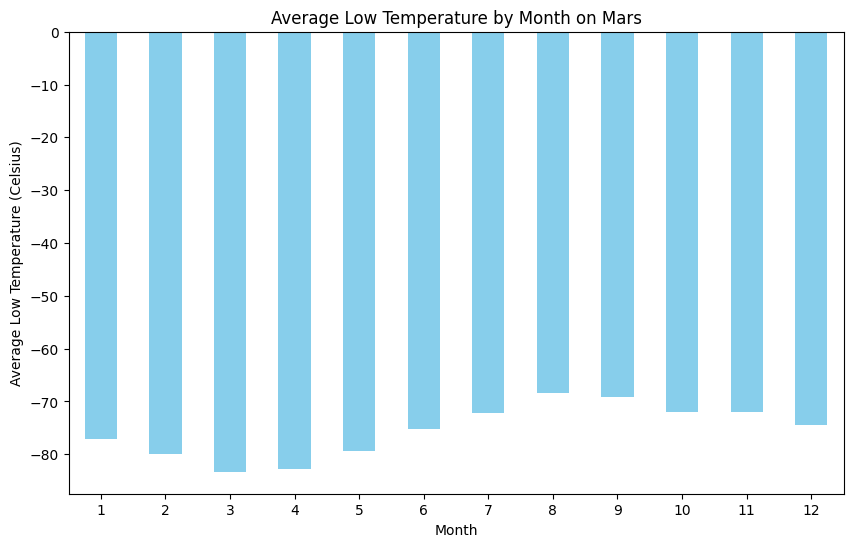

In [155]:
# Plot the average temperature by month
plt.figure(figsize=(10, 6))
avg_low.plot(kind='bar', color='skyblue')
plt.title('Average Low Temperature by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Average Low Temperature (Celsius)')
plt.xticks(rotation=0)
plt.show()

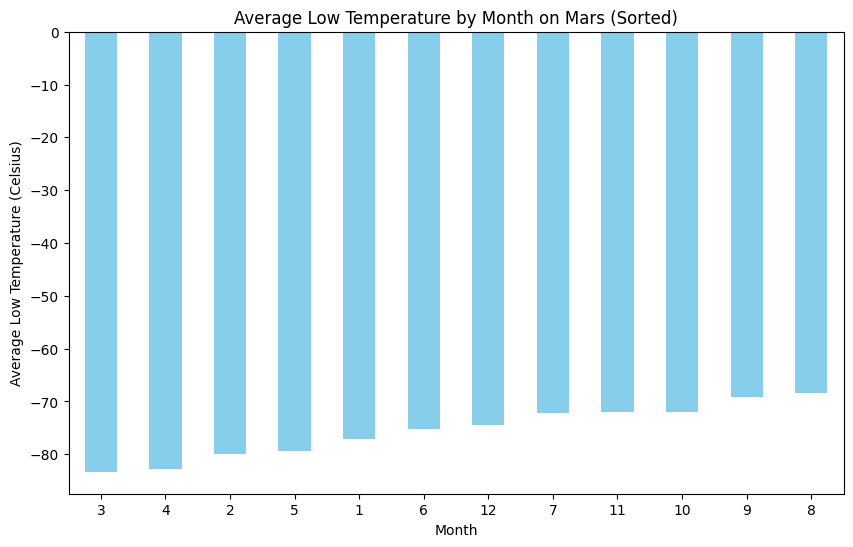

In [162]:
# Identify the coldest and hottest months in Curiosity's location
sorted = avg_low.sort_values()

# Plot the sorted average temperature by month
plt.figure(figsize=(10, 6))
sorted.plot(kind='bar', color='skyblue')

plt.title('Average Low Temperature by Month on Mars (Sorted)')
plt.xlabel('Month')
plt.ylabel('Average Low Temperature (Celsius)')
plt.xticks(rotation=0)
plt.show()

In [163]:
# 4. Average pressure by Martian month
avg_pressure = mars_temp_df.groupby('month')['pressure'].mean()
avg_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

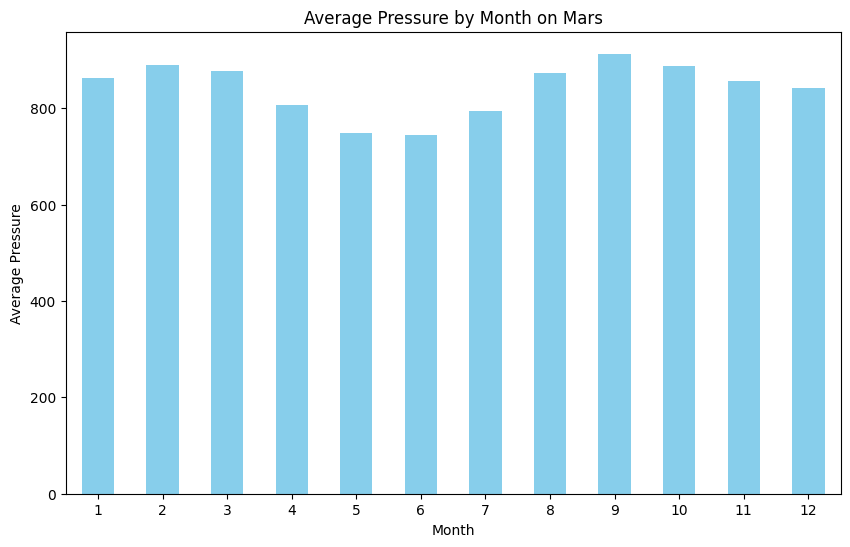

In [168]:
# Plot the average pressure by month
plt.figure(figsize=(10, 6))
avg_pressure.plot(kind='bar', color='skyblue')

plt.title('Average Pressure by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Average Pressure')
plt.xticks(rotation=0)
plt.show()


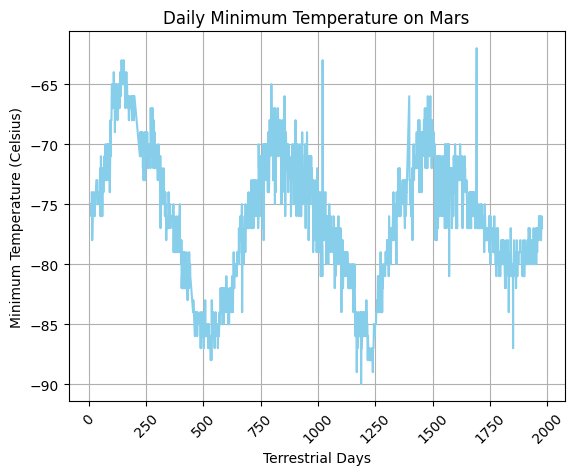

In [180]:
# 5. How many terrestrial (earth) days are there in a Martian year?

plt.plot(mars_temp_df['sol'], mars_temp_df['min_temp'], linestyle='-', color='skyblue')
plt.title('Daily Minimum Temperature on Mars')
plt.xlabel('Terrestrial Days')
plt.ylabel('Minimum Temperature (Celsius)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [181]:
# Write the data to a CSV
csv_file_path = 'mars_data.csv'

# Export the DataFrame to CSV
mars_temp_df.to_csv(csv_file_path, index=False)

In [182]:
browser.quit()